# Made by :- PRAKHAR SINGH PARMAR

## HRC ID: HRC61623WK

# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Store the dataset into the Dataframe


In [2]:
df=pd.read_csv('dataset.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [3]:
df['due_in_date'][5]

20191004.0

In [169]:
df[['due_in_date','baseline_create_date']].head()

,due_in_date,baseline_create_date
0,2020-02-10,2020-01-26
1,2019-08-11,2019-07-22
2,2019-09-29,2019-09-14
3,2020-04-10,2020-03-31
4,2019-11-28,2019-11-13


### Check the shape of the dataframe


In [4]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
df.isnull().sum()/len(df)*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [11]:
df[['baseline_create_date','document_create_date','document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Please check, Column 'posting_id' is constant columns or not


In [12]:
df.posting_id.nunique()
# psoting id has only one unique value hence it is a constant column

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
df.isOpen.nunique()
# isOpen has two unique values hence it's not a constant column
# this column is not necessary since many clear_date values are missing and isOpen cannot be determined until all clear_date is provided

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [14]:
df.drop(columns=['area_business','posting_id','invoice_id','document_create_date.1','isOpen','document type','document_create_date'],axis=1,inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [15]:
df.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8


### Show all the Duplicate rows from the dataframe

In [16]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [17]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [18]:
df.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [19]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [20]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [21]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

## Data type Conversion 

### Please check the data type of each column of the dataframe

In [22]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'])
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['clear_date']=pd.to_datetime(df['clear_date'])

In [24]:
df['due_in_date'].dtypes

dtype('<M8[ns]')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [25]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [26]:
df['total_open_amount']=np.where(df['invoice_currency']=='CAD',df['total_open_amount']*0.7, df['total_open_amount'])

In [27]:
df['invoice_currency']=np.where(df['invoice_currency']=='CAD','USD', df['invoice_currency'])

#### display the "total_open_amount" column value

In [28]:
df['total_open_amount'].dtypes

dtype('float64')

In [29]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,USD,2309.79,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df.rename(columns={'total_open_amount':'converted_usd'}, inplace=True)

### Display the new "converted_usd" column values

In [31]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

<AxesSubplot:xlabel='buisness_year', ylabel='count'>

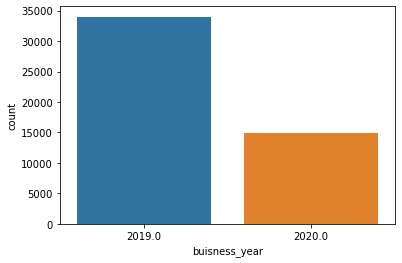

In [32]:
sns.countplot(x='buisness_year',data=df)

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [33]:
df.drop('invoice_currency',axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [34]:
df.shape

(48839, 11)

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
df[df.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms
0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
1,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
2,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
3,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
49996,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
49997,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN
49998,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaT,NaN


#### Find out the number of null values from the column that you got from the above code

In [36]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
converted_usd              0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [37]:
maindata=df[df['clear_date'].isna()==False]

In [38]:
nulldata=df[df['clear_date'].isna()==True]

In [39]:
df[df['clear_date'].isna()].shape

(9681, 11)

### Check the number of Rows and Columns for both the dataframes 

In [40]:
maindata.shape

(39158, 11)

In [41]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [42]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,54273.280,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,79656.600,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2253.860,2019-09-14,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,33133.290,2019-11-13,NAH4
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,15558.088,2019-09-24,CA10


In [43]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2309.79,2020-03-31,CA10
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,11173.02,2020-03-19,NAA8
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,3525.59,2020-03-11,NAA8
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,121105.65,2020-04-15,NAA8
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,3726.06,2020-04-16,NAM2


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [44]:
maindata['delay']=df['clear_date']-df['due_in_date']
maindata['delay'].head()

0    1 days
1   -3 days
2   92 days
4   -3 days
5   61 days
Name: delay, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [45]:
avgdelay =pd.DataFrame(maindata.groupby('name_customer')['delay'].mean(numeric_only=False))

avgdelay.rename(columns={'delay': 'avg_Delay'}, inplace=True)
avgdelay

,avg_Delay
name_customer,
11078 us,17 days 00:00:00
17135 associates,-10 days +00:00:00
17135 llc,-3 days +00:00:00
236008 associates,-3 days +00:00:00
99 CE,2 days 00:00:00
...,...
YEN BROS corp,0 days 00:00:00
YEN BROS corporation,-1 days +12:00:00
YEN BROS llc,-2 days +00:00:00


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [46]:
# mapping the delays as per the customer names
maindata["avg_delay"] = maindata["name_customer"].map(avgdelay['avg_Delay'])

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [47]:
maindata["avg_delay"] = maindata["avg_delay"] / np.timedelta64(1, 's')
maindata["avg_delay"].head()

0   -2.334702e+05
1    1.641600e+06
2    6.990545e+05
4   -1.887923e+05
5    6.172800e+06
Name: avg_delay, dtype: float64

### Display the maindata dataframe 

In [48]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms,delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,54273.280,2020-01-26,NAH4,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,79656.600,2019-07-22,NAD1,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2253.860,2019-09-14,NAA8,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,33133.290,2019-11-13,NAH4,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,15558.088,2019-09-24,CA10,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,84780.400,2019-07-10,NAC6,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,6766.540,2019-08-15,NAH4,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,6120.860,2020-02-19,NAA8,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,63.480,2019-11-27,NAA8,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [49]:
maindata.drop(columns=['delay','clear_date'],axis=1,inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [50]:
X=maindata.drop('avg_delay',axis=1)
X.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,54273.280,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,79656.600,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2253.860,2019-09-14,NAA8
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,33133.290,2019-11-13,NAH4
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,15558.088,2019-09-24,CA10


In [51]:
y=maindata['avg_delay']
y

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_loc_test, y_train, y_loc_test=train_test_split(X,y,test_size=0.4, random_state=42, shuffle=False)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [54]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((23494, 10), (15664, 10), (23494,), (15664,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [55]:
X_test,X_val, y_test, y_val=train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=42, shuffle=False)

### Please check for the number of rows and columns of all the 4 dataframes 

In [56]:
X_test.shape,X_val.shape, y_test.shape, y_val.shape

((7832, 10), (7832, 10), (7832,), (7832,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

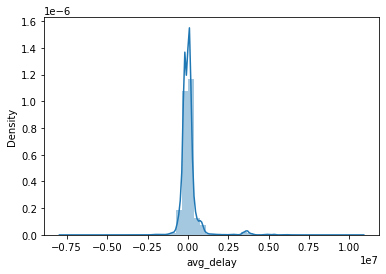

In [57]:
sns.distplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [58]:
groupby=X_train.groupby(by=['name_customer'],as_index=False)['doc_id'].count()
groupby.head()

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,236008 associates,1
3,99 CE,2
4,99 CE associates,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

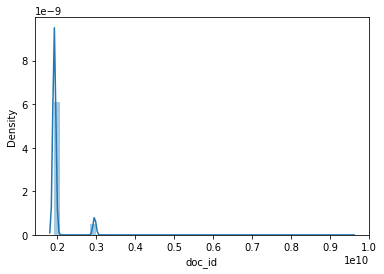

In [59]:
sns.distplot(X_train['doc_id'])

In [60]:
X_train['doc_id'].astype(int)

0        1930438491
1        1929646410
2        1929873765
4        1930147974
5       -2147483648
            ...    
29659    1929725188
29662    1930468866
29663    1929143067
29664    1928949641
29665    1929086556
Name: doc_id, Length: 23494, dtype: int32

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='doc_id', ylabel='buisness_year'>

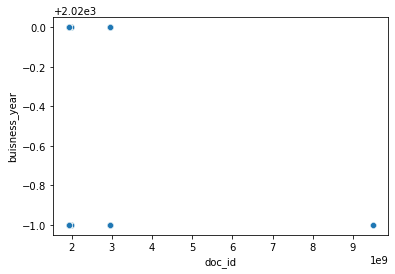

In [61]:
sns.scatterplot(x=X_train['doc_id'], y=X_train['buisness_year'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [62]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,54273.280,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,79656.600,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2253.860,2019-09-14,NAA8
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,33133.290,2019-11-13,NAH4
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,15558.088,2019-09-24,CA10
...,...,...,...,...,...,...,...,...,...,...
29659,U001,0200772670,ASSOCIAT associates,2019.0,1.929725e+09,2019-08-08,2019-08-23,17737.190,2019-08-08,NAU5
29662,U001,0200794332,COST corporation,2020.0,1.930469e+09,2020-02-06,2020-02-21,62408.160,2020-02-06,NAAX
29663,U001,0200769623,WAL-MAR associates,2019.0,1.929143e+09,2019-04-14,2019-04-29,20265.150,2019-04-14,NAH4
29664,U001,0200696090,UNITE,2019.0,1.928950e+09,2019-03-18,2019-04-02,4962.340,2019-03-18,NAA8


In [63]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132842,2.012017e+09,30762.476822
std,0.339412,2.853757e+08,36595.303329
min,2019.000000,1.928502e+09,2.400000
25%,2019.000000,1.929181e+09,4620.800000
50%,2019.000000,1.929733e+09,17027.670000
75%,2019.000000,1.930209e+09,45545.810000
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [64]:
from sklearn.preprocessing import LabelEncoder   # ordinal encoding
business_coder = LabelEncoder()
business_coder.fit_transform(X_train['business_code'])

array([1, 1, 1, ..., 1, 1, 1])

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [65]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [66]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [67]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
0,U001,1
1,U001,1
2,U001,1
4,U001,1
5,CA02,0
...,...,...
29659,U001,1
29662,U001,1
29663,U001,1
29664,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [68]:
def dropcol(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [69]:
traindf , valdf , testdf = dropcol(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [70]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [71]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [72]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [73]:
X_train ,X_val, X_test = dropcol(['name_customer'])

In [74]:
maindata['name_customer']

0              WAL-MAR corp
1                    BEN E 
2                MDV/ trust
4        WAL-MAR foundation
5          THE  corporation
                ...        
49994          C&S WH trust
49996            WAL-MAR co
49997      SAFEW associates
49998             BJ'S  llc
49999              DEC corp
Name: name_customer, Length: 39158, dtype: object

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [75]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [76]:
X_train ,X_val, X_test = dropcol(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [77]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
converted_usd                    float64
baseline_create_date      datetime64[ns]
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [78]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
converted_usd                    float64
baseline_create_date      datetime64[ns]
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [79]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
converted_usd                    float64
baseline_create_date      datetime64[ns]
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [80]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the dropcol function for train, test and validation dataset

In [81]:
X_train ,X_val, X_test = dropcol(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [82]:
X_train['day_of_baseline_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_date'] = X_test['baseline_create_date'].dt.year



### pass the "baseline_create_date" column into the dropcol function for train, test and validation dataset

In [83]:
X_train ,X_val, X_test = dropcol(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [84]:
X_train['day_of_duedate'] = X_train['due_in_date'].dt.day
X_train['month_of_duedate'] = X_train['due_in_date'].dt.month
X_train['year_of_duedate'] = X_train['due_in_date'].dt.year

X_val['day_of_duedate'] = X_val['due_in_date'].dt.day
X_val['month_of_duedate'] = X_val['due_in_date'].dt.month
X_val['year_of_duedate'] = X_val['due_in_date'].dt.year


X_test['day_of_duedate'] = X_test['due_in_date'].dt.day
X_test['month_of_duedate'] = X_test['due_in_date'].dt.month
X_test['year_of_duedate'] = X_test['due_in_date'].dt.year



pass the "due_in_date" column into the dropcol function for train, test and validation dataset

In [85]:
X_train ,X_val, X_test = dropcol(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [86]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_baseline_date        int64
month_of_baseline_date      int64
year_of_baseline_date       int64
day_of_duedate              int64
month_of_duedate            int64
year_of_duedate             int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [87]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [88]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [89]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [90]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [170]:
train=X_train.copy()
handling_correlation(train.copy(), 0.85)

['day_of_baseline_date',
 'year_of_duedate',
 'year_of_baseline_date',
 'month_of_duedate',
 'month_of_baseline_date',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

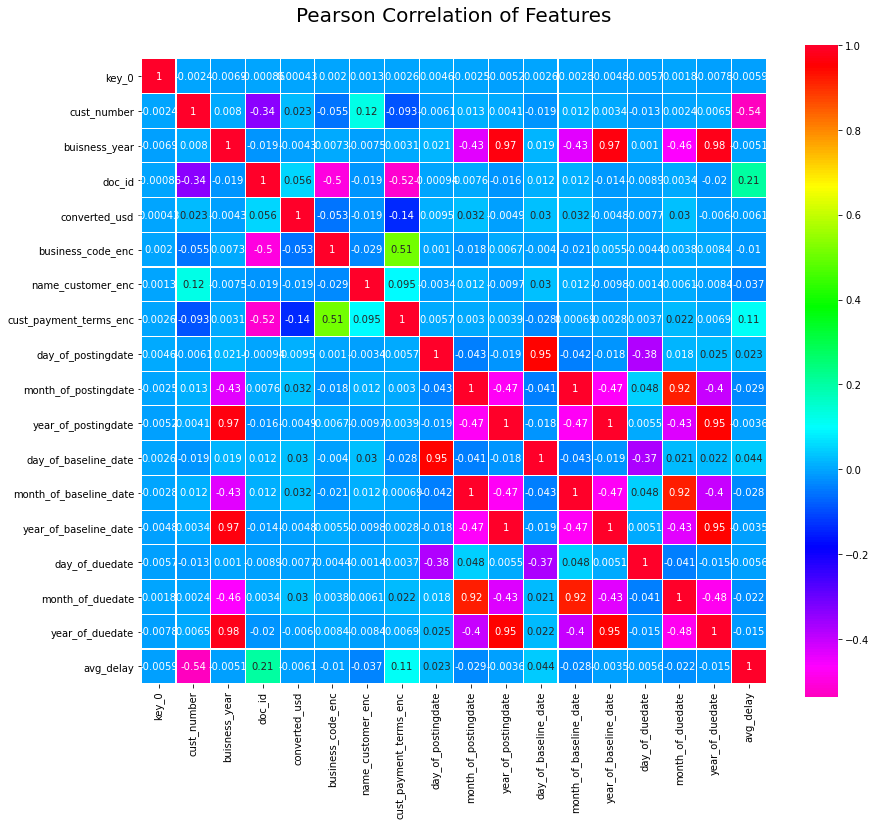

In [92]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [93]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [94]:
sel.variances_

array([1.79867713e+15, 1.15195317e-01, 8.14358365e+16, 1.33915922e+09,
       2.89199371e-01, 1.06851239e+06, 1.17330626e+02, 7.55002009e+01,
       1.22507253e+01, 1.15661120e-01, 7.71513423e+01, 1.22576245e+01,
       1.15788866e-01, 7.61732267e+01, 1.20393869e+01, 1.18619907e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [95]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# r2_score should  be 0 and 1; more closer than 1 means value more closer than the regressor line
# MSE is better if less...less MSE means less deviation from the mean

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [96]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [97]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [98]:
MSE_Score, R2_Score

([311972933351.4311], [0.355163438506939])

### Check the same for the Validation set also 

In [99]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

549425.4754674142

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[311972933351.4311],[0.355163438506939],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn import svm
vector=svm.SVR()
vector.fit(X_train, y_train)
vector.score(X_test, y_test)

-0.008519782291616984

In [102]:
Algorithm.append('Support Vector Regression')

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [103]:
predic=vector.predict(X_test)
r2_score(y_test, predic)

-0.008519782291616984

In [104]:
MSE_Score.append(mean_squared_error(y_test, predic))
R2_Score.append(r2_score(y_test, predic))

### Check the same for the Validation set also 

In [105]:
predic_val=vector.predict(X_val)
mean_squared_error(y_val, predic_val, squared=False)

666612.3709174186

### Display The Comparison Lists

In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[311972933351.4311, 487923442330.8179],[0.355163438506939, -0.008519782291616984],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [107]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)
predicted= DTregressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [108]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [109]:
predict_test= DTregressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

523376.29339801177

### Display The Comparison Lists

In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression'],[311972933351.4311, 487923442330.8179, 193852948922.62244],[0.355163438506939, -0.008519782291616984, 0.599313095287853],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [111]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
RDregressor = RandomForestRegressor()
RDregressor.fit(X_train, y_train)
predicted= RDregressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [112]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [113]:
predict_test= RDregressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

390305.6252418936

### Display The Comparison Lists


In [114]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression', 'RandomForestRegressor'],[311972933351.4311, 487923442330.8179, 193852948922.62244, 126448323703.4492],[0.355163438506939, -0.008519782291616984, 0.599313095287853, 0.7386359727186902],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
import xgboost as xgb

In [117]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
XGBregressor = xgb.XGBRegressor()
XGBregressor.fit(X_train, y_train)
predicted = XGBregressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [118]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [119]:
predict_test= XGBregressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

388365.49821576604

### Display The Comparison Lists


In [120]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression', 'RandomForestRegressor', 'XGB Regressor'],[311972933351.4311, 487923442330.8179, 193852948922.62244, 126448323703.4492, 131468887353.43555],[0.355163438506939, -0.008519782291616984, 0.599313095287853, 0.7386359727186902, 0.7282586525901925],

## You need to make the comparison list into a comparison dataframe 

In [121]:
dict= {'Algorithm':Algorithm, 'MSE_Score':MSE_Score, 'R2_Score':R2_Score}

algo_table=pd.DataFrame(dict)

In [122]:
algo_table

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.119729e+11,0.355163
1,Support Vector Regression,4.879234e+11,-0.008520
2,DecisionTreeRegression,1.938529e+11,0.599313
3,RandomForestRegressor,1.264483e+11,0.738636
4,XGB Regressor,1.314689e+11,0.728259


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [123]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [124]:
mean_squared_error(y_test,predictedfinal,squared=False)

362586.38605639286

### Calculate the mean Square Error for validation dataset

In [125]:
predict_test= regressorfinal.predict(X_val)
mean_squared_error(y_val, predict_testfinal, squared=False)

388365.49821576604

### Calculate the R2 score for test

In [126]:
r2_score(y_test, predictedfinal)

0.7282586525901925

### Calculate the R2 score for Validation

In [127]:
r2_score(y_val, predict_testfinal)

0.6591069073563807

### Calculate the Accuracy for train Dataset 

In [128]:
accuracy=regressorfinal.score(X_train, y_train)*100
print(round(accuracy, 2), '%')

95.49 %


### Calculate the accuracy for validation

In [129]:
accuracy=regressorfinal.score(X_val, y_val)*100
print(round(accuracy, 2), '%')

65.91 %


### Calculate the accuracy for test

In [130]:
accuracy=regressorfinal.score(X_test, y_test)*100
print(round(accuracy, 2), '%')

72.83 %


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

### We have calculated the R2_score and Mean_squared_error of every model and we found that XGBoost is giving the least Mean  Square Error and R2_square is giving max value amongst other models;
### Hence we are choosing XGBoost as our final model

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [131]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2309.79,2020-03-31,CA10
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,11173.02,2020-03-19,NAA8
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,3525.59,2020-03-11,NAA8
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,121105.65,2020-04-15,NAA8
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,3726.06,2020-04-16,NAM2
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,13114.99,2020-03-10,NAH4
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,8899.71,2020-05-03,NAH4
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,4967.06,2020-03-11,NAA8
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,1998.64,2020-03-25,NAA8


### Check for the number of rows and columns in the nulldata

In [132]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [133]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [134]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   converted_usd         9681 non-null   float64       
 9   baseline_create_date  9681 non-null   datetime64[ns]
 10  cust_payment_terms    9681 non-null   object        
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [135]:
backup=nulldata.copy(deep=True)

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [136]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [137]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [138]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year


nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [139]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [140]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
converted_usd                    float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [141]:
nulldata.drop(columns=['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],axis=1, inplace=True)

### Check the information of the "nulldata" dataframe

In [142]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [143]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 29666 to 39758
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_baseline_date    7832 non-null   int64  
 11  month_of_baseline_date  7832 non-null   int64  
 12  year_of_baseline_date   7832 non-null   int64  
 13  day_of_duedate          7832 non-null   int64  
 14  month_of_duedate        7832 non-nu

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [144]:
nulldata.shape, X_test.shape

((9681, 16), (7832, 16))

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [145]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_date', 'month_of_baseline_date',
       'year_of_baseline_date', 'day_of_duedate', 'month_of_duedate',
       'year_of_duedate'],
      dtype='object')

In [146]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [171]:
nulldata.shape

(9681, 16)

In [147]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

In [148]:
nulldata2.shape

(9681, 16)

### Display the Final Dataset

In [149]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,64,2712,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,64,2795,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,64,93,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,64,2021,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,64,722,34,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,64,2987,32,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,64,2985,32,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,64,796,20,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,64,2759,20,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [150]:
final_result=regressorfinal.predict(nulldata2)
final_result

array([1057809.6 ,  365663.97,  140559.44, ..., -466576.97,  248276.16,
        -84906.55], dtype=float32)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [151]:
final_result = pd.Series(final_result, name='avg_delay')

### Display the "avg_delay" column

In [152]:
final_result[0]//86400

12.0

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [153]:
backup.reset_index(drop=True,inplace=True)
Final = backup.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [154]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2309.79,2020-03-31,CA10,1.057810e+06
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,11173.02,2020-03-19,NAA8,3.656640e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,3525.59,2020-03-11,NAA8,1.405594e+05
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,121105.65,2020-04-15,NAA8,3.162862e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,3726.06,2020-04-16,NAM2,-3.513269e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,13114.99,2020-03-10,NAH4,4.311172e+05
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,8899.71,2020-05-03,NAH4,6.232464e+05
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,4967.06,2020-03-11,NAA8,-4.665770e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,1998.64,2020-03-25,NAA8,2.482762e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [155]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [156]:
Final['avg_delay']=Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [157]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='D')

### Display the "clear_date" column

In [158]:
Final['clear_date']

0      2020-04-22
1      2020-04-07
2      2020-03-27
3      2020-05-03
4      2020-04-21
          ...    
9676   2020-03-29
9677   2020-05-25
9678   2020-03-20
9679   2020-04-11
9680   2020-05-05
Name: clear_date, Length: 9681, dtype: datetime64[ns]

In [159]:
Final[['clear_date', 'due_in_date']]

,clear_date,due_in_date
0,2020-04-22,2020-04-10
1,2020-04-07,2020-04-03
2,2020-03-27,2020-03-26
3,2020-05-03,2020-04-30
4,2020-04-21,2020-04-26
...,...,...
9676,2020-03-29,2020-03-25
9677,2020-05-25,2020-05-18
9678,2020-03-20,2020-03-26
9679,2020-04-11,2020-04-09


### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [160]:
# Final['avg_delay'] = Final['avg_delay']//86400

### Display the "avg_delay" column 

In [161]:
Final['avg_delay']=Final['avg_delay'].astype(int)
Final['avg_delay']

0       12
1        4
2        1
3        3
4       -5
        ..
9676     4
9677     7
9678    -6
9679     2
9680    -1
Name: avg_delay, Length: 9681, dtype: int32

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [162]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [163]:
Final.drop(columns=['key_0','avg_delay'], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [164]:
Final['Aging Bucket'].value_counts()

0-15               7735
16-30               169
31-45                69
46-60                 6
Greatar than 60       5
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [165]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,converted_usd,baseline_create_date,cust_payment_terms,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-22,2020.0,2.960623e+09,2020-03-30,2020-04-10,2309.79,2020-03-31,CA10,0-15
1,U001,0200744019,TARG us,2020-04-07,2020.0,1.930659e+09,2020-03-19,2020-04-03,11173.02,2020-03-19,NAA8,0-15
2,U001,0200418007,AM,2020-03-27,2020.0,1.930611e+09,2020-03-11,2020-03-26,3525.59,2020-03-11,NAA8,0-15
3,U001,0200739534,OK systems,2020-05-03,2020.0,1.930788e+09,2020-04-15,2020-04-30,121105.65,2020-04-15,NAA8,0-15
4,U001,0200353024,DECA corporation,2020-04-21,2020.0,1.930817e+09,2020-04-23,2020-04-26,3726.06,2020-04-16,NAM2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-29,2020.0,1.930625e+09,2020-03-10,2020-03-25,13114.99,2020-03-10,NAH4,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-25,2020.0,1.930851e+09,2020-05-03,2020-05-18,8899.71,2020-05-03,NAH4,0-15
9678,U001,0200148860,DOLLA co,2020-03-20,2020.0,1.930638e+09,2020-03-11,2020-03-26,4967.06,2020-03-11,NAA8,NaN
9679,U001,0200900909,SYSCO co,2020-04-11,2020.0,1.930702e+09,2020-03-25,2020-04-09,1998.64,2020-03-25,NAA8,0-15


### Store this dataframe into the .csv format

In [166]:
Final.to_csv('HRC61623WK_prakhar.csv')

# END OF THE PROJECT

In [167]:
pickle.dump(regressorfinal, open('model.sav', 'wb'))

NameError: name 'pickle' is not defined

In [ ]:
nulldata=pd.read_csv('nulldata.csv')

In [ ]:
nulldata.info()

In [ ]:
nulldata.head()

In [ ]:
def alll():
    print(" Predict")

    nulldata = pd.read_csv("nulldata.csv")


    nulldata["clear_date"]=pd.to_datetime(nulldata.clear_date)
    nulldata["posting_date"]=pd.to_datetime(nulldata.posting_date)
    nulldata["due_in_date"]=pd.to_datetime(nulldata.due_in_date)
    nulldata["baseline_create_date"]=pd.to_datetime(nulldata.baseline_create_date)


    nulldata1=nulldata.copy()

    from sklearn.preprocessing import LabelEncoder
    business_codern = LabelEncoder()
    business_codern.fit(nulldata['business_code'])
    nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])
    
   # if :
    #nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
    nulldata['cust_number'] = nulldata['cust_number'].replace('CCCA02',"1").replace(['CCU001','CCU013','CCU002'],"2").replace(['CC3411','CC6000'],"3").astype(int)
    #nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").astype(int)
    #nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCU',"2").astype(int)
    #nulldata['cust_number'] = nulldata['cust_number'].str.replace('CC',"3").astype(int)



    nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
    nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
    nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

    nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
    nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
    nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

    nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
    nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
    nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

    nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
    nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
    nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year
    
    

    label_encoder = EncoderExt()
    label_encoder1 = EncoderExt()
    label_encoder1.fit(nulldata['cust_payment_terms'])
    label_encoder1.fit(nulldata['business_code'])
    label_encoder.fit(nulldata['name_customer'])
    nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
    nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
    nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


    nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms"],axis=1,inplace=True)
    nulldata.drop(['day_of_cleardate',"month_of_cleardate","year_of_cleardate"],axis=1,inplace=True)

    nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
           'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
           'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
           'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
           'day_of_due', 'month_of_due', 'year_of_due']]

    model = pickle.load(open("model.sav", 'rb'))

    final_result = model.predict(nulldata2)

    final_result = pd.Series(final_result,name='avg_delay')

    nulldata1.reset_index(drop=True,inplace=True)
    Final = nulldata1.merge(final_result , on = nulldata.index )

    Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

    Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

    bins= [0,15,30,45,60,100]
    labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
    Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)


    Final.drop(['key_0',"avg_delay"],axis=1,inplace=True)
    Final.to_csv("Final.csv")
    Final1=Final[['doc_id','Aging Bucket']].copy()
    doc = Final1["doc_id"].tolist()
    aging= Final1["Aging Bucket"].tolist()   
    a=[]
    for i in range(len(doc)):
        #if doc[i] in doc_list:
        a.append({"doc_id":doc[i],"aging_bucket": str(aging[i])})
    

    return a

In [ ]:
alll()

In [ ]:
import pickle